In [1]:
from skimage import io
import tribolium_clustering as tc
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

folder = tc.get_folder_path()
image = io.imread(folder + 'MAX_Lund_18.0_22.0_Hours Z-projection t1.tif')



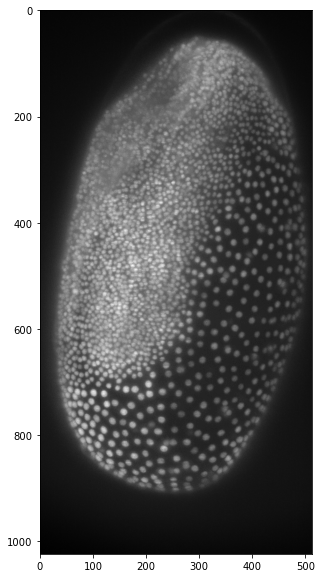

In [3]:
fig, ax = plt.subplots(1,1,figsize = (10,10))
ax.imshow(image, cmap = 'gray')

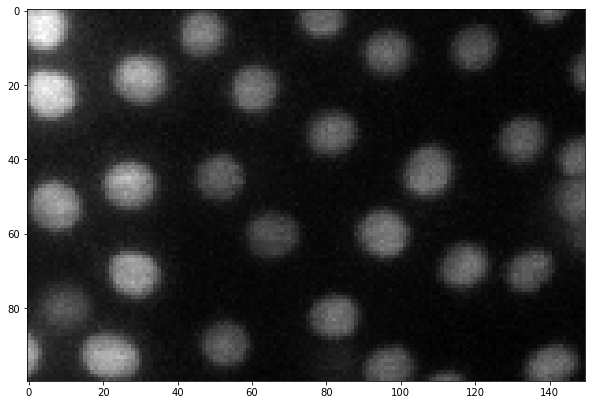

In [6]:
image_crop = image[700:800,200:350]
fig, ax = plt.subplots(1,1,figsize = (10,10))
ax.imshow(image_crop, cmap = 'gray')

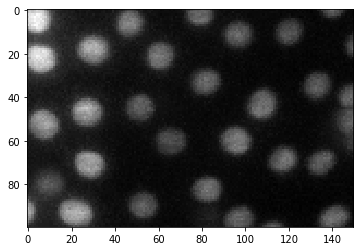

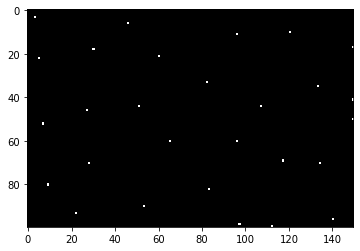

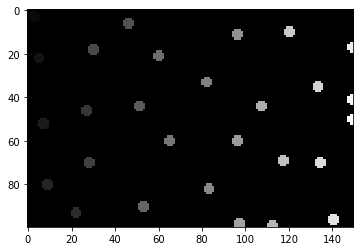

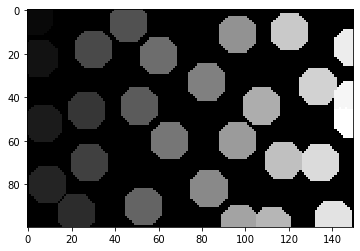

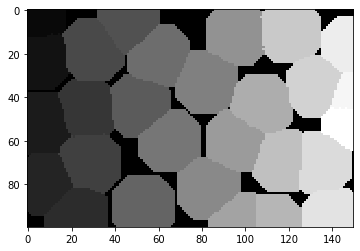

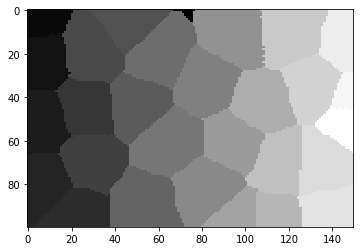

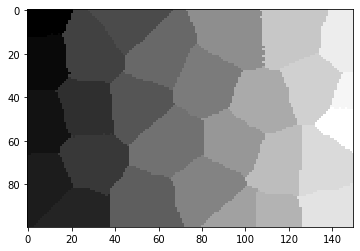

In [33]:
def dilate_labels(gpu_labelled_spots, number_of_dilations):
    flip = cle.create_like(gpu_labelled_spots)
    flop = cle.create_like(gpu_labelled_spots)
    flag = cle.create([1,1,1])
    cle.copy(gpu_labelled_spots, flip)

    for i in range (0, number_of_dilations) :
        cle.onlyzero_overwrite_maximum_box(flip, flag, flop)
        cle.onlyzero_overwrite_maximum_diamond(flop, flag, flip)

    return flip

gpu_img = cle.push(image_crop)
blur = cle.gaussian_blur(gpu_img, sigma_x=3,sigma_y=3)
maxima = cle.detect_maxima_box(blur)
cca = cle.connected_components_labeling_diamond(maxima)
expanded_list = [dilate_labels(cca,i) for i in range(1,15,3)]
cle.imshow(gpu_img,color_map='gray')
cle.imshow(maxima,color_map='gray')
for img in expanded_list:
    cle.imshow(img, color_map='gray')

images_list = [image_crop, cle.pull(maxima)] + [cle.pull(img) for img in expanded_list[:4]]

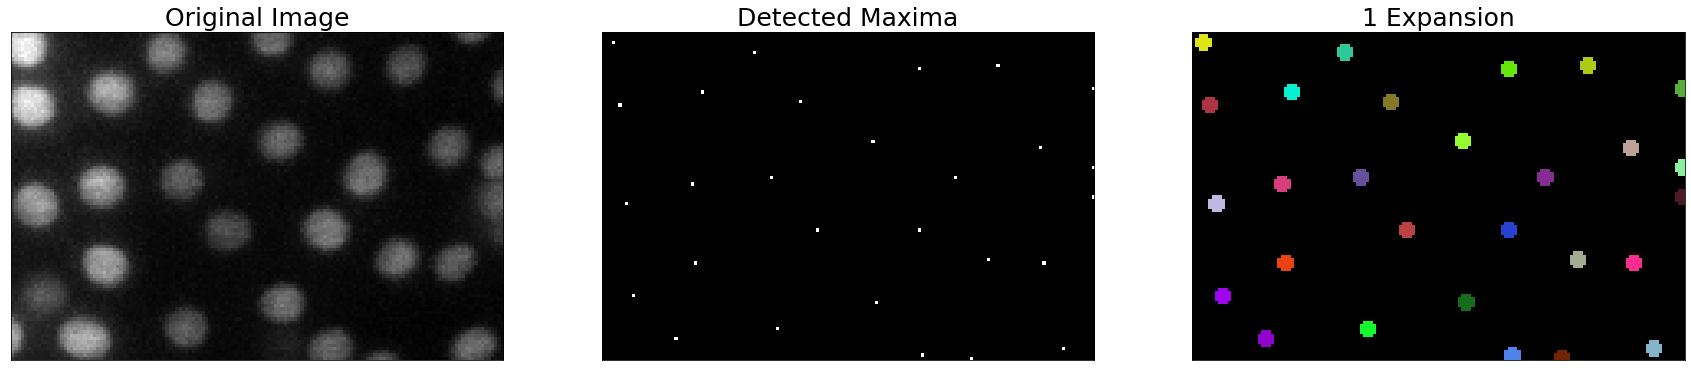

In [94]:
import matplotlib

def random_cmap(seed = 1):
    import numpy as np
    np.random.seed(seed)
    black = np.zeros((1,3), dtype=float)
    randcmap = np.append(black,(np.random.rand(255,3)),axis=0)
    a_values = np.ones((256,1), dtype=float)
    rgba = np.append(randcmap,a_values, axis = 1)
    
    return rgba

titles1 = ['Original Image', 'Detected Maxima', '1 Expansion']
my_cmap = matplotlib.colors.ListedColormap(random_cmap(),)

fig, axs = plt.subplots(1,3, figsize = (30,10))
for i, img in enumerate(images_list[:3]):
    if i ==2:
        axs[i].imshow(img, cmap = my_cmap)
    else:
        axs[i].imshow(img, cmap = 'gray')
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
    axs[i].set_title(titles1[i], fontsize=25)
    

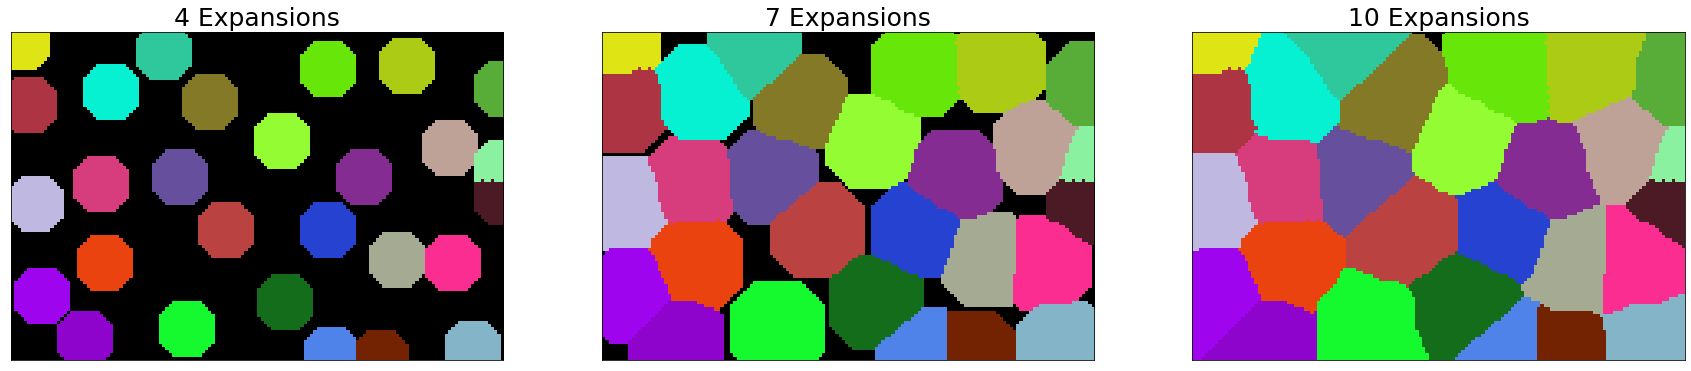

In [95]:
titles2 = ['4 Expansions', '7 Expansions', '10 Expansions']
fig, axs = plt.subplots(1,3, figsize = (30,10))
for i, img in enumerate(images_list[3:]):
    if i >=0:
        axs[i].imshow(img, cmap = my_cmap)
    else:
        axs[i].imshow(img, cmap = 'gray')
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
    axs[i].set_title(titles2[i], fontsize=25)